In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
# set the random state same
np.random.seed(0)

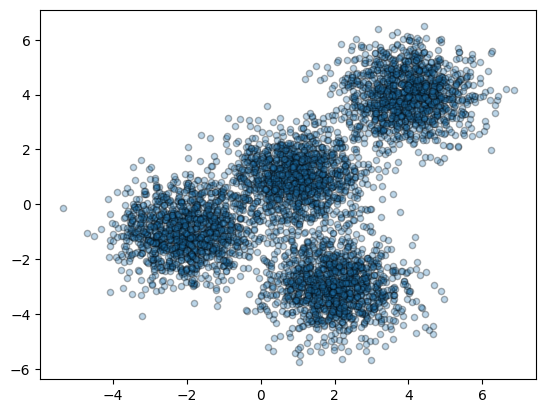

In [3]:
# using make_blobs class to generate datasets
X, y = make_blobs(n_samples=5000, centers=[[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], marker='.', alpha=0.3, edgecolors='k', s=80)

In [4]:
# k-means++ optimize the initial cluster center
# n_clusters is number of clusters we want
# n_init is the number of independent iterations the algorithm runs to initilize the centroid and uses the best centroid out of all
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

In [5]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [6]:
# which cluster (0, 1, 2, 3) the data point belongs to
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [7]:
# centers of the 4 clusters
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

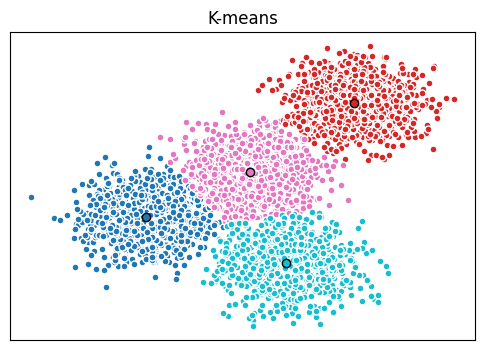

In [24]:
# initialize the plot with specific dimension
fig = plt.figure(figsize=(6,4))

# using colormap module plt.cm.tab10 which has 10 different colors to choose from
# it takes values from 0 to 1.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# create a subplot
ax = fig.add_subplot(1, 1, 1)

# creates cluster_id and color
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # create a boolean_mask for each cluster when loop runs
    my_members = (k_means_labels == k)

    # get the cluster center of the specific cluster
    cluster_center = k_means_cluster_centers[k]

    # X[my_members, 0] in numpy gets all the true values using the boolean_mask and 
    # 0 gives us the first item in the array i.e. x-coordinate of the array
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)

    # plotting the cluster centeroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', ms=6)

ax.set_title('K-means')

# remove x, y ticks
ax.set_xticks(())
ax.set_yticks(())

plt.show()

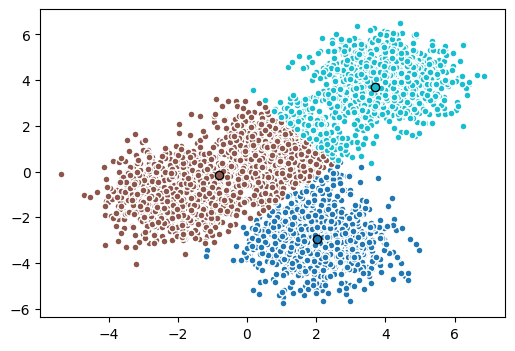

In [37]:
# 3 clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means_3.fit(X)
fig, ax = plt.subplots(figsize=(6,4))
colors = plt.cm.tab10(np.linspace(0, 1, num=len(set(k_means_3.labels_))))
for k, col in enumerate(colors):
    my_members = (k_means_3.labels_ == k)
    cluster_center = k_means_3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', ms=6)
plt.show()

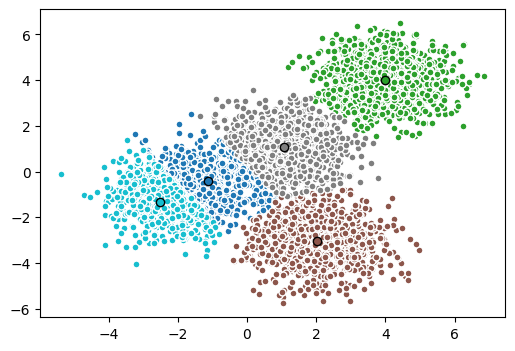

In [38]:
# 5 clusters
k_means_5 = KMeans(init='k-means++', n_clusters=5, n_init=12)
k_means_5.fit(X)
fig, ax = plt.subplots(figsize=(6,4))
colors = plt.cm.tab10(np.linspace(0, 1, num=len(set(k_means_5.labels_))))
for k, col in enumerate(colors):
    my_members = (k_means_5.labels_ == k)
    cluster_center = k_means_5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', ms=6)
plt.show()

In [40]:
# customer segmentation 
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [41]:
# dropping Address field as it is a categorical value
df = df.drop('Address', axis=1)
df = df.dropna()
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [45]:
# normalizing the dataset
# remove the Customer Id	
X = df.iloc[:, 1:]
X = StandardScaler().fit_transform(X)
X[:5]

array([[ 0.76830405,  0.29879269, -0.35900652, -0.72310225, -0.67569934,
        -0.60428433, -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891,  1.47870741,  1.43142147,
         1.5706204 , -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057,  0.30984549,  2.15411948,
         0.83520125,  1.68081427,  1.55949495],
       [-0.73326739,  0.29879269, -0.65961006, -0.72310225, -0.41242741,
        -0.77383254, -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  3.39853777,  5.6376812 ,  3.66521532,
         1.78065319, -0.59494973, -0.44860921]])

In [46]:
# modeling
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means.fit(X)
labels = k_means.labels_

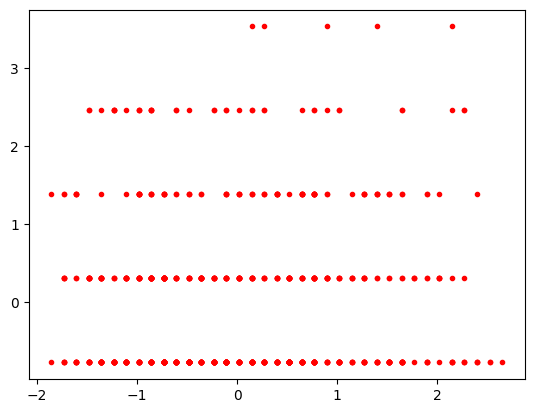

In [58]:
# for i in range(k_means.n_clusters):
#     plt.scatter(X[labels == i, 0], X[labels == i, 1], marker='.', c='red')